# 8 step checklist for End-toEnd ML solution:
1) Get the big picture <br>
- Frame the problem
- Select the performance measures
- Check the assumptions

2) [Get the data](#get_data) <br>
    <ul> <li>[Stratified Sampling](#Stratified_Sampling) </li></ul>
3) [Visualize](#visualize) and get insights from the data <br>
    <ul> 
        <li>[Pandas Correlation Plot](#scatter_matrix) </li>
        <li>[Feature Engineering](#feature_engineering) </li>
    </ul>
4) [Prepare](#data_preparation) data for the ML algorithm <br>
    <ul> 
        <li>[Data Cleaning](#data_preparation) </li>
        <li>Handling [Non-Numerical](#non_numerical_attributes) attributes </li>
        <li>[Custom Transformers](#cust_trans) </li>
        <li>[Feature Scaling](#feature_scaling) </li>
        <li>[Transformation Pipelines](#trans_pipelines) </li>
            - Pipeline <br>
            - ColumnTransformer <br>
    </ul>
5) [Select & Train](#model_training) the model <br>
6) [Fine tune](#tuning) the model <br>
7) Present the solution <br>
8) [Launch, Monitor & Maintain Your System](#launch) <br>
___
9) [Exercise](#exercise)

In [1]:
import os
import tarfile
import urllib

# 1) Get Big Picture
- ### <b><font color="green">Frame </font>the problem</b>: What is the Business Objective and what is the current situation?
- ### <b><font color="green">Select </font>the performance measures</b>: 
    - $\Large RMSE(X,h) = \sqrt {\frac{1}{m} \sum_{i=1}^m (h(x^i)-y^i} $ <br> <br>
    - $\Large MAE(X,h) = \frac{1}{m} \left\lvert{\sum_{i=1}^m (h(x^i)-y^i}\right\rvert $ <br> <br>
    > RMSE corresponds to Eucledian Norm $\Large l_2$  or $\Large \lVert.\rVert _2  $ <br>
    > MAE corresponds to Manhattan Norm $\Large l_1$  or $\Large \lVert.\rVert _1  $ <br>
- ### <b><font color="green">Check </font>the assumptions</b>

<a id="get_data"></a>
# 2) Get  Data

## Download data from internet
```python
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
```

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [65]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    print(csv_path)
    return pd.read_csv(csv_path)

In [66]:
housing = load_housing_data()
housing.head()

datasets\housing\housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [67]:
print(housing.shape)
print(housing.info())

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [68]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [69]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


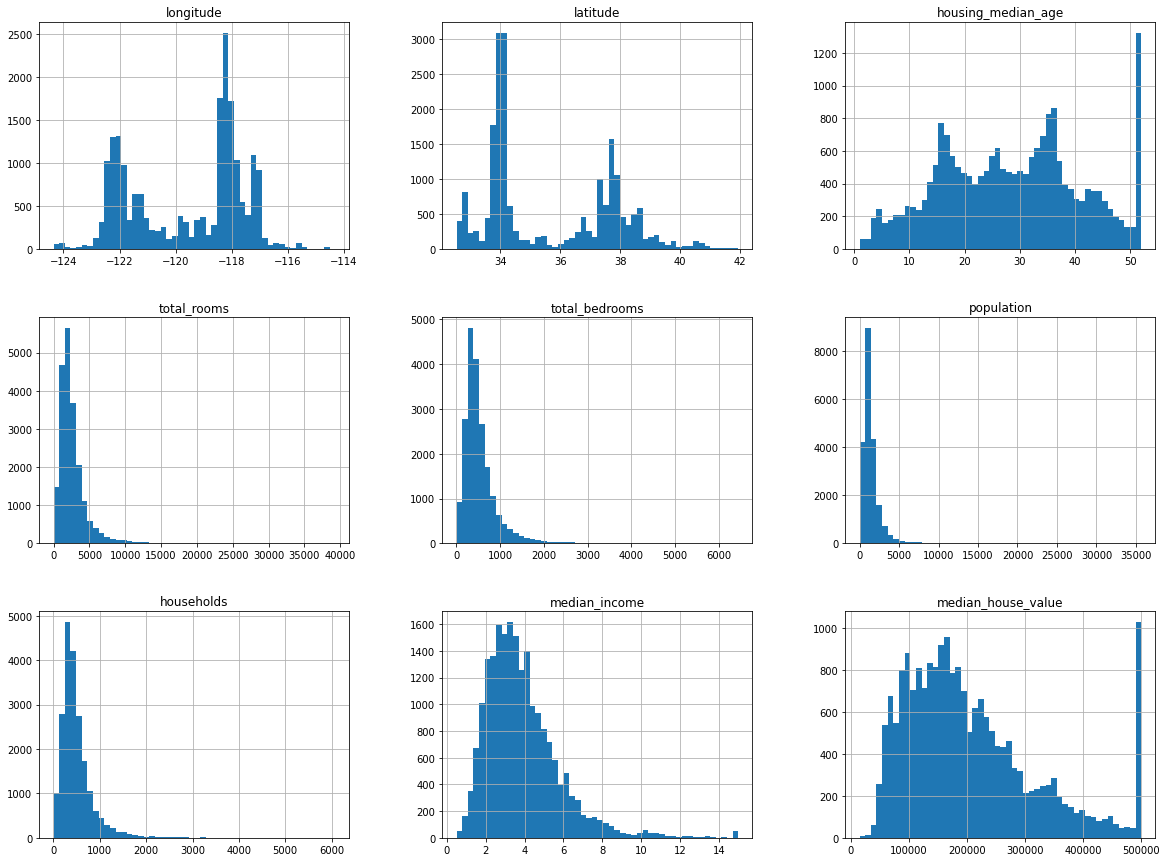

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Train-Test Split

In [71]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [72]:
print(train_set.shape)
print(test_set.shape)
print(housing.shape)

(16512, 10)
(4128, 10)
(20640, 10)


<a id="Stratified_Sampling"></a>
## Stratified Sampling
```python
pd.cut(df['col_name'],
       bins=[0,x,y,z,np.inf],
       labels=[1,2,3,4,5])
```

> Here, category 1 ranges from 0-x (exclusive of x), category 2 ranges from x-y (inclusive of x, exclusive of y) & so on

In [73]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

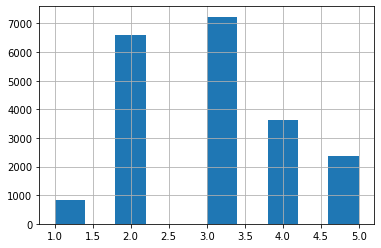

In [74]:
housing["income_cat"].hist()
plt.show()

### Stratified Sampling

```python
from sklearn.model_selection import StratifiedShuffleSplit

split_name = StratifiedShuffleSplit(n_splits=splitting_process_iteration_count, test_size=0.2, random_state=42)
for training_df_index_range, test_df_index_range in split_name.split(df, deciding_attribute):
    stratified_train_set = df.loc[training_df_index_range]
    stratified_test_set  = df.loc[test_df_index_range]
```

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit


stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [76]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [77]:
print(len(strat_test_set))
print(len(strat_train_set))

4128
16512


<hr>

<a id="visualize"></a>
# 3) Discover & Visualize the Data to Gain Insights

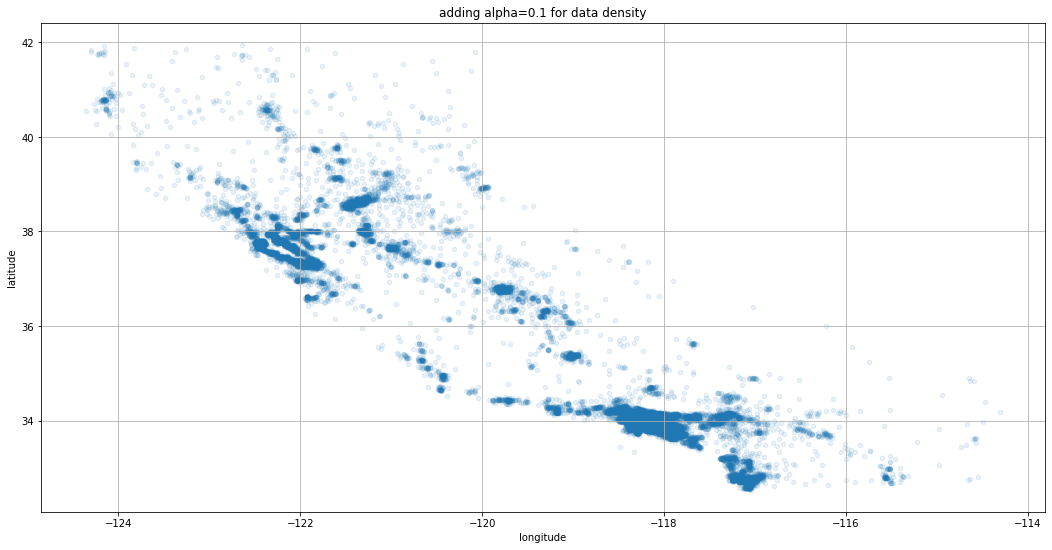

In [78]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x='longitude', y="latitude", alpha=0.1, title="adding alpha=0.1 for data density", figsize=(18,9), grid=True, legend=True)
plt.show()

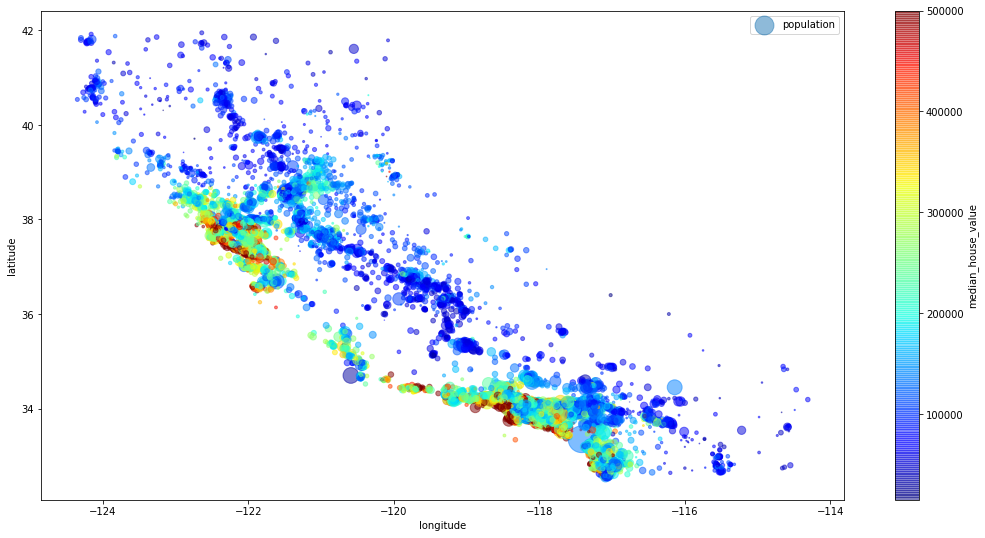

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=housing["population"]/50, label="population", figsize=(18,9),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
# plt.legend()
plt.show()
# save_fig("housing_prices_scatterplot")

<a id="scatter_matrix"></a>
### Pearson's r / Standard Correlation Coefficient
```python
from pandas.plotting import scatter_matrix
```

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


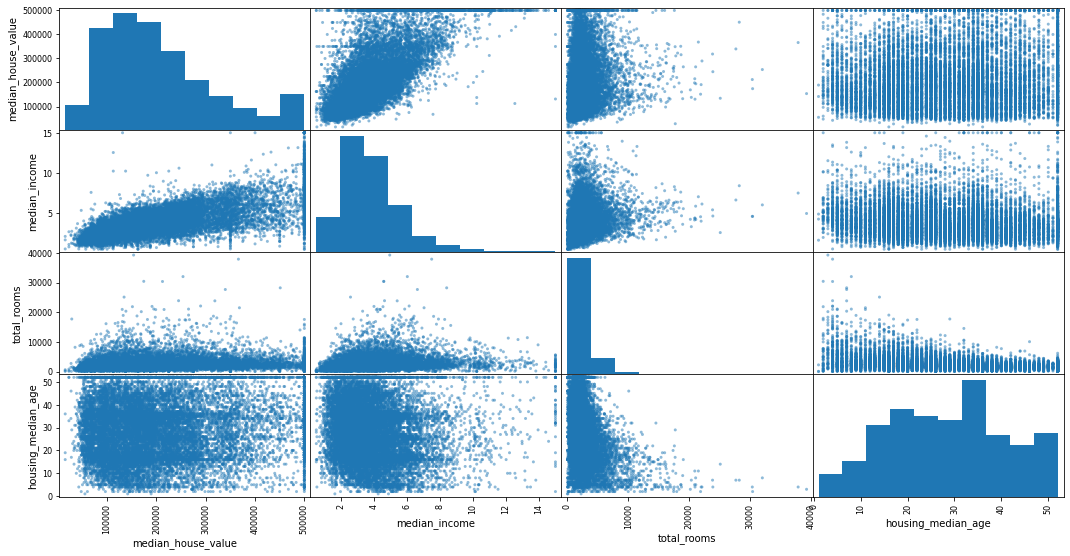

In [80]:
corr_matrix = housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(18,9))
plt.show()

<a id="feature_engineering"></a>
### Feature Engineering

In [81]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [82]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

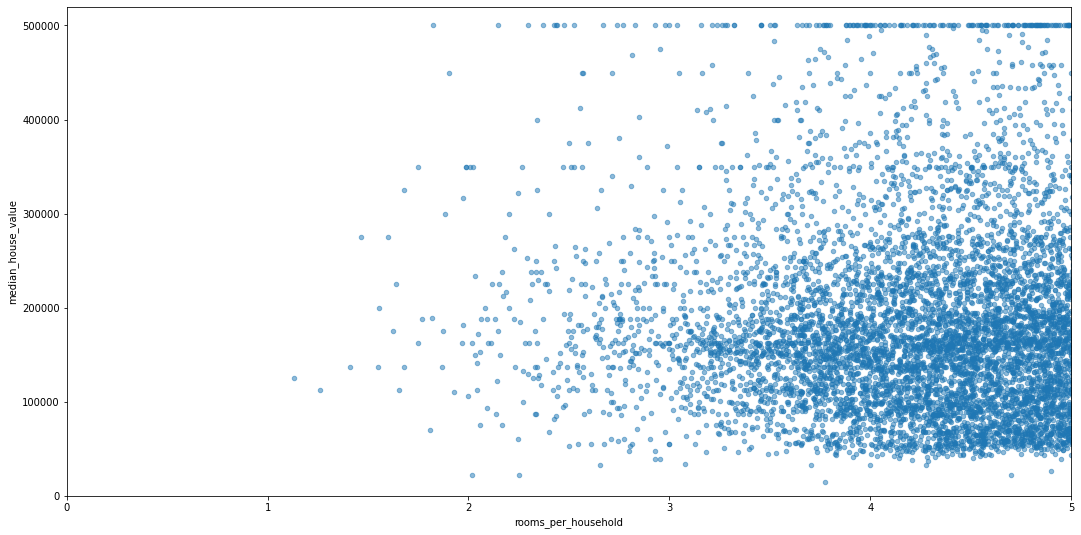

In [83]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.5, figsize=(18,9))
plt.axis([0, 5, 0, 520000])
plt.show()

<a id="data_preparation"></a>
# 4) Prepare the data for Machine Learning algorithms
Till now we have:
- `Housing` df which is directly imported
- `strat_train_set` & `strat_test_set`, i.e. Stratified Sampling of Housing df

###  Data Cleaning

1. Get rid of the instance, i.e. the particular cell/record
```python
housing.dropna(subset=['col_name'])
```
<br>

2. Get rid of the whole attribute
```python
housing.drop("col_name",axis=1)
```
<br>

3. Impute the missing instances with a Central Tendency
```python
impute_1 = housing['col_name'].median()
impute_2 = housing['col_name'].mean()
housing['col_name'].fillna(impute_k, inplace=True)
```
<br>

<b>Other ways of Imputing</b>
```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(startegy="median")
housing_num = housing.drop("cate_col_name",axis=1)
imputer.fit(housing_num)
```

### Explore *[sklearn](https://homl.info/11)*

In [84]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3


In [85]:
print(housing.shape)
housing.dropna(subset=["total_bedrooms"]).shape

(16512, 10)


(16354, 10)

In [86]:
print(housing.shape)
housing.drop("total_bedrooms", axis=1).shape

(16512, 10)


(16512, 9)

In [87]:
print(housing["total_bedrooms"].notnull().sum())
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing["total_bedrooms"].notnull().sum()

16354


16512

In [94]:
housing = strat_train_set.drop("median_house_value", axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing.select_dtypes(include="float64"))
# imputer.statistics_ # for viewing the values

X = imputer.transform(housing.select_dtypes(include="float64"))
type(X)

numpy.ndarray

In [97]:
housing_tr = pd.DataFrame(X, columns=housing.select_dtypes(include="float64").columns, index=housing.select_dtypes(include="float64").index)
print(housing.shape); print(housing_tr.shape)
housing_tr.head()

(16512, 10)
(16512, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


<a id="non_numerical_attributes"></a>
## Handling Categorical values
```python
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
```

In [99]:
housing_cat = housing.select_dtypes(include="object")
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [115]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()

print(housing_cat['ocean_proximity'].unique())
housing_cat_encoded = ord_encoder.fit_transform(housing_cat)
print(ord_encoder.categories_)
print(np.unique(housing_cat_encoded))

['<1H OCEAN' 'NEAR OCEAN' 'INLAND' 'NEAR BAY' 'ISLAND']
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
[0. 1. 2. 3. 4.]


- ### Disadvantages of Encoder (in this kind of instances)
> ML Algorithm could consider that 0 is closely related to 1, and least related to 4, which makes no sense
> ML Algorithm could consider the values as nominal value, i.e. instances where 4 occurs is of greater significance than the instances where 0 occurs, which again, makes no significance in this case

### Solution to the problem:
```python
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
```

In [117]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()

In [119]:
housing_cat_hot_encoded = hot_encoder.fit_transform(housing_cat)
print(hot_encoder.categories_)
housing_cat_hot_encoded.toarray()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

<a id="cust_trans"></a>
### Custom Transformer
> Creating a `custom transformer` which will create some addition attributes, as per our needs

In [160]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CustomCombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

<a id="feature_scaling"></a>
### Feature Scaling
- **Min-Max Scaler or Normalization** (*boundation is always 0-1, but can't handle outliers*)
- **Standardization** (*can handle outliers in data, but no generic boundary*)

> always ***fit*** on *training set* and never on test or validation/holdout set <br>
> ***transform*** on *whole dataset*

In [146]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = np.random.randint(100,size=(5,5))

print("1)\n",data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print("\n2)\n",scaled)

print(f"\nMin-Max values in each column")
print(f"Max: {scaler.data_max_}")
print(f"Min: {scaler.data_min_}")

1)
 [[95 22 67 95  7]
 [42 75 47 22 61]
 [64 69 50 27 78]
 [94 38 16 60 79]
 [90 39 63 91 51]]

2)
 [[1.         0.         1.         1.         0.        ]
 [0.         1.         0.60784314 0.         0.75      ]
 [0.41509434 0.88679245 0.66666667 0.06849315 0.98611111]
 [0.98113208 0.30188679 0.         0.52054795 1.        ]
 [0.90566038 0.32075472 0.92156863 0.94520548 0.61111111]]

Min-Max values in each column
Max: [95. 75. 67. 95. 79.]
Min: [42. 22. 16. 22.  7.]


In [145]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = np.random.randint(100,size=(5,5))

print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

print(f"\nMean: {scaler.mean_}")

[[88 16 45 55 47]
 [20 57  2 72 54]
 [21 18  1 13 44]
 [21 63 96 87  1]
 [76 18 63 33  9]]
[[ 1.41310317 -0.87615074  0.09874917  0.11313105  0.73991653]
 [-0.83201401  1.07614167 -1.08075486  0.75420701  1.06363002]
 [-0.79899758 -0.78091697 -1.10818518 -1.47070367  0.60118218]
 [-0.79899758  1.361843    1.49769582  1.31986227 -1.3873435 ]
 [ 1.01690602 -0.78091697  0.59249505 -0.71649666 -1.01738523]]

Mean: [45.2 34.4 41.4 52.  31. ]


<a id="trans_pipelines"></a>
### Transformation Pipelines
```python
from sklearn.pipeline import Pipeline
pipline_name = Pipeline([
    ('name1', estimator1()),
    ('name2', estimator2()),
    ('name3', estimator3())
])
```

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CustomCombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num = housing.select_dtypes(include="float64")
housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

```python
from sklearn.compose import ColumnTransformer
pipeline_name = ColumnTransformer([
    ("numericals", num_pipeline, col1_list),
    ("categoricals", OneHotEncoder(), col2_list),
])
```

In [192]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # returns list of columns in the df
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [193]:
housing_prepared.shape

(16512, 16)

<a id="model_training"></a>
# 5) Select & Train the model 
<font color="teal">**By now we have:**</font>
- Framed the problem
- Got data
- Explored the data
- Sampled Training & Testing dataset
- Applied Transformation Piplines

<font color="teal">***In terms of data***</font>, till now we have:
```python
housing = raw data
strat_train_set & strat_test_set # i.e. Stratified Sampling of Housing df
housing = strat_train_set.copy()
X = imputer.transform(housing.select_dtypes(include="float64"))
housing_num = housing.select_dtypes(include="float64")
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_prepared = full_pipeline.fit_transform(housing)
```

Next step is, <font color="teal">***Selecting and Training***</font> a model
```python
model_name.fit(predictors, labels)
predictions = model_name.predict(predictors)
eval_metric = metric_name(labels, predictions)
```

In [204]:
housing = load_housing_data()

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

housing = strat_train_set.copy()
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # returns list of columns in the df
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

datasets\housing\housing.csv


(16512, 16)

In [205]:
# Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)

68628.19819848922


In [206]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)

print(tree_rmse)

0.0


#### Cross Validation Score
```python
cross_val_score(model_name, predictors, labels, scoring="scoring_name", cv=k)
```

In [207]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

tree_rmse_scores

array([69152.02958555, 68129.47344033, 71459.93013104, 70279.15654975,
       71513.78661063, 75171.93237185, 71461.01060878, 70443.52097884,
       76983.67907561, 69055.39432282])

In [208]:
def display_score(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {np.mean(scores)}")
    print(f"Std Dvtn: {scores.std()}")

In [209]:
display_score(tree_rmse_scores)

Scores: [69152.02958555 68129.47344033 71459.93013104 70279.15654975
 71513.78661063 75171.93237185 71461.01060878 70443.52097884
 76983.67907561 69055.39432282]
Mean: 71364.99136751932
Std Dvtn: 2623.5659702514276


In [210]:
# Linear Regression Scores
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_score(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Std Dvtn: 2731.6740017983493


In [212]:
# Random Forest: Training many decision tree on random subsets of features & then averaging their predictions
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)

print(forest_rmse)

18603.515021376355


In [213]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

forest_rmse_scores

array([49519.80364233, 47461.9115823 , 50029.02762854, 52325.28068953,
       49308.39426421, 53446.37892622, 48634.8036574 , 47585.73832311,
       53490.10699751, 50021.5852922 ])

In [214]:
display_score(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Std Dvtn: 2097.0810550985693


In [216]:
import joblib
joblib.dump(forest_reg,"rforrest_housing.pkl")

loading = joblib.load("rforrest_housing.pkl")

<a id="tuning"></a>
# 6) Fine Tune Your Model
- Grid Search
- Randomized Search
- Ensemble Methods
- Analyze Best Model
- Evaluate on Test Set

In [225]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [226]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [227]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [228]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [229]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B096B0250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B0964FF70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [230]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


<a id="launch"></a>
# Launch, Monitor & Maintain Your System

<a id="exercise"></a>
# Exercise

In [231]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(housing_prepared, housing_labels)
svr_predictions = svr_reg.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

118580.68301157995

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 'degree':[1,2,3,4], 'C':[1,2,3,4,5]},
    {'shrinking':[False], 'kernel':['linear', 'poly'], 'degree':[1,2,3,4]}
]

grid_search = GridSearchCV(svr_reg, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)